In [1]:
output_names = ['Logits/Softmax']
input_names = ['input_1']

import tensorflow as tf


def get_frozen_graph(graph_file):
    """Read Frozen Graph file from disk."""
    with tf.gfile.FastGFile(graph_file, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    return graph_def


trt_graph = get_frozen_graph('./trt_graph_rpi.pb')

# Create session and load graph
tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
tf_sess = tf.Session(config=tf_config)
tf.import_graph_def(trt_graph, name='')


# Get graph input size
for node in trt_graph.node:
    if 'input_' in node.name:
        size = node.attr['shape'].shape
        image_size = [size.dim[i].size for i in range(1, 4)]
        break
print("image_size: {}".format(image_size))


# input and output tensor names.
input_tensor_name = input_names[0] + ":0"
output_tensor_name = output_names[0] + ":0"

print("input_tensor_name: {}\noutput_tensor_name: {}".format(
    input_tensor_name, output_tensor_name))

output_tensor = tf_sess.graph.get_tensor_by_name(output_tensor_name)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


Instructions for updating:
Use tf.gfile.GFile.
image_size: [224, 224, 3]
input_tensor_name: input_1:0
output_tensor_name: Logits/Softmax:0


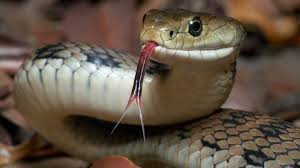

In [2]:
#img_path = './elephant.jpg'
import urllib.request

url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUTEhMVFRUXFxUVFRcVFRUVFRUVFRUWFxUVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0fHx8tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLSstLS0tLS0tLS0tLS0tLTctNzctN//AABEIAKgBLAMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAEBQIDBgABBwj/xABAEAABAwIFAQYEBAUBBgcAAAABAAIRAwQFEiExQVETImFxgZEGMqGxFELB0RUjUuHwggczYpLC0hYXJENTY4P/xAAYAQADAQEAAAAAAAAAAAAAAAABAgMABP/EACIRAAICAgMAAgMBAAAAAAAAAAABAhESIQMxQRNRIjJhQv/aAAwDAQACEQMRAD8AwNTDx0Q78OHRPF3ZqJZIS0MME7J1Z2YCtp0wiAdEbNiU1DCCq3CJuQlFzIQCQvLknZJriiXbo4vPKk10pkL2KmWs8I2jZJlStwrxRWyGURc60EIKrh8lPxTUhRWsOKFlhhoCcU7IAKdBsIyFOx1CkAfhwvTTRTgq3BOChbeN0SqjZFzpT+pSlXWdqBqkbNjZ2HWcJs2oGhJ7i/Dm/wAp4A1E8nKYJHhoUvbVq8OcfMmElDZJDy8udEkuDKpr1XzDj7SD7KGaNdfqqKkRbbCKFuSimtghLQRwXTvoSP1V1Oq+RrPmmyQDSW1MRJS3FI1hVfxNzRqw+/j4oR18Du0/RCzEWkgIq2vNQDuhnPDgSJ9kI1hBkJuwmxtocFcKOqEwd0gJ00BcXNo7OJ6B6VJWObCIa0LnUtFGLopIAc5U1dQrrimQgqlSF0xlZJoX3DcpXU7pddvkJNVqOCrRFuhncXgCBfiOqXXdVxCVua9FRsV8lG0oPPKIzKoN0XAppISLLu1VlOpKEcp0nJRgiqgK9GUa5ypehbHwE1azdwvKFm4HUpsYVktTJiY7KaNOArMqm0KWVEoV5V4QrF4QgwpHlNFt2QgV9Mqa7KVom4KGVW5VF6omI0CvOq8vXHsX5d8pA9dFz90XbW5f3Ruf0SSdbALbWxyMaAJgAIwW7chLgWu2AGuh5mNI00WnbaNJPdOhg6gAEbgEb+ysq4W2o8kMytOwBzANHU/qox5NiOJjW0WnTX1Bn3VlbBSQI8x0Pqt/U+HqNKn2mfMTp3GOIB6Tys9XuGB5ptcA8AOyOPeExByiQJ15TO7ETQnw/BHZgHBuxJmeCBv11Wgw3C6TqzaNNjc75DS5wDRAJJJ40B2nhV2sua6odAO40czu7b0Hulnxqw07ajBh9SoTA3gMJE89PdNBXJJiylrRl8cpN7ZzXV29oHOBDc/ZiCYYHDTj6pja2wfTbUjQ8dI0IHlCy34Co92xjcujugcuLtoX0b4ctGOtJdTHzvIcW/MCSYnfmI8FTmSSBCTErcGkS46dBwOPNccLK11GnIHcOY7AD5o2I8IEquthzpzOMD+lp+7v291JNjtoyAZVZ8oI1jQxr5AIqljNRsCpr1I3/utM3DoMBvd/p69SD18eUnx3DYghsB0xPEQJMTGpWay0zRnj0QpYsDqDoiqeLjqshiL8jgRAB3HQjohhd9Cl+FFfnZvvxYcEJWZKzVhiZ2JTujdAhTccGXjJTQQyyzLqmFDor7aujHVBCfPQmNMy9/h4HCSutoWqxKuIKylxW7xTQm0T5IphFPEDyjqF2CvKmCO6KoYU8cFdJKg/NKupUpQDKLxwUXQqOG6DiaydalCHIRNWogbi5DNyPLlJRaMlWyzIqaz4VLcUB2a4+S9ZTqPMlhy9I1TKDFlyx8DLSrKMhQs7Sm5steAfWR6KT6TmGCC8f1RAHhKKFzR7lUSEX+BeRLQfAH91Q2mZyu7ruh3SjqaKC1XUAvCwgwQR9lNmiVplItPRcVRVKIlUVgijMDLtU8+GXjO7XWAAekn5o5/eFn6m6Lwpj3PyU4zu2kwBGpk+i0o2iMmbiuxoAjYab/5KZ4RTcPD2iCCI+pWBr087iwvzQSC9jiG6bkespr8O0L8VALdr61I75vygfmzuIiem6iuF9ovLiahkzZU6U09fmbLXeYjXyIM+qwtjgzRe3Fae0c8Na0T3RsHFxHyjuj3MLW0MSLKrxXpFshrTmEtkT6TqirwtcC4QBHEDTwhMrj0cT2Z6pY21NrQym0jQuJmST8zjr126AIe7wahXpGnU7vLSAM7HDlr9z5HyTLEaLGsDGmXEBvroFG4ZTAkuGiT80H8TD/8AgV4JzV2ZA4xAOdwHJbsDr4rX0beadOk2QxoBETLm6DXx11Pir6NxbimC4knUnzJJ/UKLviSm0gMbpBH2/ZUeUlsGl0M6VLSCIGmx1AGx02U/w7Dv8wGo2kHkfskbviPpASq8xx0giZ4489Sio4oFNs2NO3aBuP8ANllMaqZpyjQEwfVv3g+yq/jdWqMrWHoSASfSEoxm/cAWtaRGhkRrtABTJIFMz+MMkEwJdIHl/kpCLchOrqqJQNWoFVBoEbVLSnNlf6JNVpypWzCOUnLBSQ/HPFmnp30K1+K+Kz2c9VU8krmjxM6HyIaXeI5tAlxYTqqg09EUxmirg10BTi+z6nUvaPUKkXtHwVQ+Fnkbqt/wi/qumyCiVX99SHRLG3zHHQao64+HHMaXO2CqscAziQdRqUjY/wCqEWN1HgaA+YMa9Eso4dm71V4b5rVW3w067dme8tAMNDeITfFfgW0oUc9R7y4kBoLvzeXKaP16c8nswueXZKT+NTEAQtFhOBl/edVc7wDoH0Wgt/8AZ9bPymXBsbNMT5o68+CqNtQc5lWqHASDm09kzV9CpgjcIp0qbntaZaJI0MqzD6rXskMLZGxiPXwTDCsMcR33F8gb7HwhOjgsDMxsQJI4jw6JK+hlLxmDdTq2mrsxYZPd1YJ412Q1aq2p/MYXZuM2rSOngtneVKlS3qU2Ue84EAFw29lh7H4er03tbVY5gJ3MlvqeFaEUybnQRSu87SH0SR4fcKm3qszmm8QPyl3dd5I3GLd9rDqbgRG24PklN3nuRmcBp4fqi+MKmE3Fq5h7urTydx6oetReNxodjuPdE2F9Qa0Mc57XbGSXD0R7GxGWDTcd9iCfPhRkq7LRm/sztxRc06hVsuuz1G57o1iJ5laG7olu4lnOm3iEjvHNNXK2DDNCOXO2Hnt7qZfjaclYVRiBIyj5yBtlE6fon2BfFVSiwtB1c6fdZO4rOYXloD8pyazq1ndkQeSM3qgmYvSJ1zU3dHbf8w/UBBxfhbm51JYs+q1fihrqeVwBGkzrOusqdPErHLJptngDST5bL5sy6zbOBHgVJzzvK2T9OXBH1W3t7B4EAgjkPO/kZUq2AWZc3vvh0jdu4BO+WRsV8upYg4bEq9mN1AQcx02WzX0D434z6k74YsyPzH/Vr9kPZ/CVoW655iD3yNRyIWEo/FFVvKuHxdUE+OqbKImEjdH4Qs8pnMf/ANH/ALr21w2ypiW0mT1Ikz5lfP63xbVOxKU3GN1nT3y0HgLOa8AuOT7Po2OfEVGg0hmUO4AiV8nxq8NR7nu31MDzUa9fkmT1JVdllqveJmAPL+6FuTHxUUZetXdOyqa8krV3OEg8KhmFRwqiWxZb054RDqCc29iAr3WoQZkZ5tsSjqFimdO1CvbRASjC42QUDbJv2agaKKAzVn4iLdwrKfxSCs9d0M4WdZQqis1n5Sd1NSZ0vFeG6xSs+5bDduB1KNwdzQw0tn7OHIlBYMC3fZphF2zgLmoeXNaR6Jjmm7Y9q2bKNHM0fIJgfmA/VV4bWp3XZ1XMOUasDuvWF7Vus1MjwKG+G6wNIDbLI+qfL0lT6NNc0mgZxwNRwUDaVxcsa5zCGzIDtZg6E+Cjf3P8p3kV7hNZvZs8AFr0ahlXsWtGduh5HBVVpi+YkU4J2M7Cevip3N2Aw+SFwMNFEAQNSfUlHLQMQq0w7IOXDqdx/ZN6XZlha6Nv8CEFzAS7Dhnc6pOpOgkkADmOqZNAOtPh1tTWqwACQ0aEEHk9Ch7v4EoszPp5muIOgPdPm0rTWtaB9/FeOuSXx+QDrqT08k2Rkj5z/wCX2rajahDt82UEeUJnUwh4Aa9ofI3Aj6LeucCO6I+yopQ6Z0jTbdLLYVpnzx2EFrTLTl3mZgdIXzCnUBuXvHytdVqjypAlnuQ33X3z4qvG29pXqxBZSqFvQuykN18yF+ecJoEtqbyTRot8S9xefpRI/wBSVR2WhJ0zy4vcjQxh7wiQdj6pTf1nOPe068r6rinwEHtaS2YAHQnKI36LF4rgzWS2NBpPPqlckjbkzO29y1p59E/tK+eImI5SNtrLk/sqWUKXJK0PBBAC8KkSogqaZSjlFxVgM7qLkbNRQ5xVD3dEX2ZKuo27TuYWQrEz6gc08gb+iJ+HHtzVI8NfBHGiymCY0J3HJQuDMgOdG528FSOkL2xsdV4QFEOUKjkykZxPTUC4uVBCsYs2ZIk1XNKpXochYaL1yra5eFyNgaDH3rQq61QaOjVZ6vfAc6omjduc0SIASY0Vb1RpLS+I066q6rWMtqA6jQ+RSSnU/sjqVbTwQsliaK3ufqpYccjnNGxMpPbVdI6ItlxDgVr0BxHzqstI8FLDnwyEsFwrrO40hPYlDS6rdwqWFVCGBL6lbQhXWdaGwjoA0ubg5Co4DWIZrvJ+6FdWkKy1IATN6oWtjw3cCVCwu8yWuq6KVpos+jUPvxMBWMqpN2yvFZb0Ih/2sX3/AKHsR81arSpAde8HH6N+qwGCWnaXbC/Y31zsAAeyFIiPADNt1Wn+LH9re24d/u7dlS4fPy5x/ug7/W1g8nLNfCznmvaZnSAy6rxp3TVqOYeOcgKZOosfF6N9i+KVGNLGu0Onp4L55jDp0C1WOVpCyV/rquVtspFJIRsowZRbAokKQSWUJBeELoXoCJjmLnld5rzREBJkcnREtrAbt7o20n6KlrmqutXPjHgmQkiq7vyTIGm3ui7O0hg6nX3QNsDWqgRpufABaR7OE0VoZCqCFFwRlSkqyxUQGBOC4FW1EHUr6oMCL+0K7tlCm4FSNNJsraJtrBel6GyQuzpkmTk4lFlg0Ol5lOLii3J3eEspXD38I/8ADvLUGMq8KKRRdCpwUEGluh3VrHKYKGNOoWmeEW+ryErZU4KmyvGhWs1DilcyFO3u4MJELiDovH3PK2QMTTPufFXWl4I3WY/HSup3sJsgYGvF2i7e7ELFjEfFF22KAI5CuBsBWkK+hV0WVp4qOqMtsTb1T5COLND2yJFbSVnRfjqrLm7LmZGnV2nkPzH2+6yezJAdvT/EvqOcIa92pnUtAhrI9ifJUtotpupuAg9gGnwLargfcifVH52saGjYf5KGvyCwOHBc0/6ocPrmQ2dPyp2vPALEa0hZ6s7RHV63CW1naqQqBCFwUnheJQnsrl5KiSiYmXr1rgqe18FxuAtQC91UBBXV0dgP3VN1ehokoXDsdY2qHGmXjjWI8YTqLYrdGswOwLW5iO876BMHsIQFr8UNP/su9wi3Y9QI1zDzG3qq6RkyLwhK2iv/AB9F3yvHvCEu644IKAQW4clrhJR5eHDdBVRCK2K3RNjoVzaqXurwoMuDwikkK22N3P0QrqgQzqhKHdKNgouwPHWiGv0WvoVmuEt2XyuvSLTqmGFY1UoneQlcL6GjOuz6Dd2ocJG6WFkKywxtlUdCvazxMqMol7TK5XjnL0qtySgI4uVNSrCnKpuGyEKDYDc4k4fKEGcZqDop16JS+uwzorwiiMpMPp4+7loKLpY63kEJC6mqnMT/ABxYuckbajftcNHD3RNO8I5Xz8PIVzLx42cfdK+J+MZcv2fQW4iUecULAGz3jq7w6N/U+nRYSyxR7GGq+D+Wm0/mfyT/AMLZE+gVX8ffuWyeTO62EkbKLN4/FSUba4gH29cH5m9m9voSD9HL54z4iHLCmuA40ypUdTgjOx49QM3/AErJSvo2g+rdaqipVlJf44zoVB+NM4lTxY2SHJqqDq0JE/F/BUPxMnYJsGDJD59yFU66jlZ9948r1tB7tSUfj+wZDarijRyhX4g53ytKrpWreAXJlQt9AS4Aeg91qijbYE22z61HSf6ROiOtbdjTGjesiJ8iUXRY38sPPgdvMq25tnOaRlbPG8jyla/A1opqUmPGVtQD1HCCtmu1/l5htLTuihhtADWqAf8AOFCjZOD/AOS8OjU8AT1TqkhHbZ1G3cXZZDB+UPEyegKudhz26nYb5dZHJgphQs3PgVi3LMkNBmeNeiIq21JogBvmCB9ZSOY6gAUrSdWvJbz3CFXe2MiWk+rXR7phe4oGkAMmR+V36IC7xMlunaNI2nY+ayUmZuKAqdqAYLmk+f7rypUa3dW/iA4a1RMfmaGkeoQ9eht2hBB2MZgPUap8WxMqKKmIDheZnnWCjbGwptdm0LeodI/stTSbbwNvv9kKSGtsxVza5htqkb6RaYK1+TKe8NUmxqjlcDCdMEo+nmGmE7p15GqQ4cS4wEzuzlb4oNr00U/AgYiA7LuEaHAjRZmg7VMWVyzXhRayeinQ0AUXsVFG6a7Yohjwkqg2C17fTRLatvBT2JVFW21lNFitCB9IqjInVxQkwEJUtoVFIm0KzTVbWAnUxrqenimT6EKh1COE6kLQPc1Mx00aBDR0H7nc+aoLUX2Wi87ExoEcjUCQUdgVTLcUnf8A2NB8nHKfoSrG4e8jaEXSwoiDzoR5o5AoUXNOHvHRzh7EhVhpPC1N/hwL3uA+Zzne5J/VUPscrSY2Qcg0IqVuTwiKdiSdRAWhtrMZRpJIVtK2G59krkFGZrW9MGAdft5o6hYERL5HRN6uECsY+UbmBqiqeD02Dkkagk9PBBvRkm2DW9qSJiOkom3w5o7xylxPn6AJxb2WYSTlHlr7LPsxZtCrUFRpzTAcP6eNCppN9FW0uwyvTLSGtEPMZZaQD14Uza1pk1fQMbCsu7tj6eZrwNJaSdQeIleWdC6e0F1Sm0ESIbmJ6TrC1UjWgWhVZTJbUID9y4juuB2IP6Kypf04JpvaXaCAJnXYo2hh8ucahDzpl0A05MdZVtS0ZsWt18BPus2rMroEZSrH5nMZ4Bpd7klEWlq0DZhd+YloMz0lUNr1jLWsa4AkZi4tH6ry5tKjw0ODMs6lpMt8dfZGnddGtVYDiGET36QyuGsCYMdOiVvxKqDDiHRvt9wtJVwui3RrTt8wcZM/dB21jSolwqCWuMhxEwejv3TwmqrsSUfehOasub2epdEsgET0kppb2/5hRdTeNQRlcJjbLMkeinUpWZ2cAeC0OBB67JhbXFZ7Rmpsd0qF2TN4xBRlJ1aQIxSOdQcQCabBIkkE/bKq6o1+RrvGG/qR9lc+lVLgCRTbqS5rw9vllIEHxhTqWrwfncfSn/2qbRSxvc4DmbmIlZ7E8MoEajULaW14+IIkQszi4bmJGiVySVxZRJvUkZeq1rNGNSu5ncplid41srPVryShGMpbNJpBFKpGwVdd1R3gq2XkbBem5e7YKqTTEyjRfaNLTqUwZejaUoFCq7hWMwuqVnG+xbXhoaNyOETSfO6Q2+H12eITCnnA1CRxoNjLsgpOtGlAU7kzqrjeLAJnDxKofhoJV1O7lTpnWZRckgKEpdIHbhrZhXUrJsxCIDGzMn6K+nbuOrCCemx9EPkQz4J/QMaIJA6KT2iQgK10Wu6Kl1y6dE2VksRrWgrwND3QdRpolHbOndW21y4FazUPqlGSABp+yMt7BrGyRJ31S21ugT6Jy2qCQE17sH8I29oXEkbTvwERWtGAtnWDPgdERQAyR4kr23oZ3tzHTvH9Ah4g3tlbqeYHI0kgToJ2Syp8LU6w7WtIc4aAH5RxPUrU3NcMGRgg8RogaWd7QW66DXj3Wqug3aMNffBxa7uVe7ro4ajpturfhz8UGlhpPc38p0Eb8uI0WubhtUV6Ze5vZmS5oBmRsCTuNZ9ERXqgEppPxir+Gar4a+o9oqMLQJdOZpnTYEbI6hasYCAxmvUT7zyrX3Li8NZBqE6N3AbyXRsNUYLCQS98O/4W6D3Km7fRVNemeu8TbblrDTPZmSHNHy9QRz5qlmM0HGM+/wDUCEs+MWPYQC7Mye6QI06O8VRaYTRq0wWVDn5BjQ9CFT409snm10GNquNXsqNaG7idRB1hoPRMv4Y8lofV7RoMlpbE/VZR+GVW96NQeD05BTqyx6BFb5hpIIkjxEoyi+4mTXpom0iB3QI4jaFTXqmm0nKCG7icunhp9EuoUWV3udTcQ2AXEcvM+PQfdEvwSnr3n69SDB67KbST2x7bWiLbsnVtF59gPc7pc+o5pIHaUhOjZfp5RpEyn9Sq1oGZwb0kwDpwUO67p/8AyN+/2RjKnpAe+2G2+KvPyt0QN/Rc/wBV4uUEl0WbbM7e4Ulb8JC5crJ0TaRFtg0I2ixo4XLkbZqL21QFdTuQvFyAQqlcogVW7mFy5YIHeGmQXaJTaVC4kx3eD1Xi5CRo9jBoRtGmuXJGjqiEtpq+m2Nly5Ky6R2I2LarQdnjnr4FZ6/t3U/maR48e65ctHRDm409iwvK9FQg7rlyocYXbXbtt00tcTgiTC8XLWBoc2uKaQmtpfbbTH6rlyZO2hXHTLri6Eg9J+yaYc4Ck2P6QuXJ/wDRN/qLMZu3U29oBmIcGxMTmkenCKtsM0zVnTzlGjfKdz6rlyMd2Zukjx9rRbWNVgh3ZhpAgCAdx4qu7uBlcZgcnb3JXLlNyKxjZnLwU7iaDHB73gxB0EDcnwMJTU+Eru3OamWPMbNJmPI6fVcuVlokyuu66bTcKtIgROYDaPIrY08No0h3KbQSBwJOm5K5ctPaDHskxwZrAHUDT0QJxFrjlbTeXcju6es7eK5ckhFSexpOloV49eljHsdSIPBMxPEECD7pVZYrahgD6RL/AMxImT4a7eC5cq4qtCXZ/9k='  
urllib.request.urlretrieve(url, './file.jpg')  
img_path = './file.jpg'


from IPython.display import Image
Image(filename=img_path) 

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Optional image to test model prediction.

img = image.load_img(img_path, target_size=image_size[:2])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

feed_dict = {
    input_tensor_name: x
}
preds = tf_sess.run(output_tensor, feed_dict)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01755581', 'diamondback', 0.15238152), ('n01729322', 'hognose_snake', 0.14870349), ('n01735189', 'garter_snake', 0.14850394)]


In [4]:
import time
times = []
for i in range(20):
    start_time = time.time()
    one_prediction = tf_sess.run(output_tensor, feed_dict)
    delta = (time.time() - start_time)
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print('average(sec):{:.2f},fps:{:.2f}'.format(mean_delta, fps))

average(sec):0.65,fps:1.54
